In [167]:
import numpy as np
import matplotlib.pyplot as plt

In [216]:
from functools import wraps
import time

def timer(func):
    @wraps(func)
    def wrap(*args, **kargs):
        #print("@timer")
        t_start = time.time()
        value = func(*args, **kargs)
        t_end = time.time()
        t_count = t_end - t_start
        print("cost time: {:1.5f} sec".format(t_count))
        return value
    return wrap

In [217]:
# plot function
def plotCurve(x0, x1, size, func, funcName):
    '''
    plot function curve and find extremum point which ratio ~ 0
    x0, x1 is range of x-axis
    size is number of slice 
    func is the function which we want to plot
    funcName is the label of input func
    '''
    
    # set data
    x_data = np.linspace(x0, x1, size)
    y_data = func(x_data)
    dx = np.abs(x_data[1] - x_data[0])
    
    # find ratio
    dy_data = [(y_data[idx+1] - y_data[idx]) for idx in range(len(y_data)-1)] / dx
    
    # find switch point of ratio + ~ -
    x_extremum = []
    sgn = lambda x : 1 if x > 0 else -1
    sgn_tmp = sgn(dy_data[0])
    for idx in range(1, len(dy_data)):
        
        if (dy_data[idx] == 0):
            x_extremum.append(x_data[idx])
            
            if (idx+1 < len(dy_data)):
                sgn_tmp = sgn(dy_data[idx+1])
                
        elif (sgn_tmp != sgn(dy_data[idx])):
            x_extremum.append((x_data[idx] + x_data[idx-1]) / 2) # middle point
            sgn_tmp = sgn_tmp * -1
         
        #print(dy_data[idx])
        
    # minimum for not find ans
    if (len(x_extremum) == 0):
        # find ratio ~ 0
        dy_min = np.min(np.abs(dy_data))
        dy_min_index = np.where(dy_data == dy_min)
        x_extremum = x_data[dy_min_index]
        
    #x_extremum = x_data[dy_min_index]
    x_extremum = np.array(x_extremum)
    y_extremum = func(x_extremum)
    
    # plot 
    fig, ax = plt.subplots(2, 1, constrained_layout=True, figsize=(8,6), gridspec_kw={'height_ratios': [2, 1]}, dpi=80)
    ax[0].plot(x_data, y_data, color="blue", label=funcName)
    ax[0].scatter(x_extremum, y_extremum, s=60, facecolors="none", edgecolor="red", alpha=1, label="extremum value")
    ax[0].set_title("plot curve and extremum")
    #ax[0].set_xlabel("x", fontsize=14)
    ax[0].set_ylabel("f(x)", fontsize=14)
    
    ax[1].plot(x_data[:-1], dy_data, color="green", linestyle="solid", label="1-st order diffenerce")
    ax[1].set_title("plot 1-st order diffenerce")
    ax[1].set_xlabel("x", fontsize=14)
    ax[1].set_ylabel("f'(x)", fontsize=14)
    
    for idx in range(len(ax)):
        ax[idx].grid(linestyle='--')
        ax[idx].legend()
        
    #plt.xlim(-6, 6)
    #plt.ylim(-1, 30)
    #plt.xlabel("x")
    #plt.ylabel("y(x)")
    #plt.title("plot curve and extremum")
    #plt.legend()
    plt.show()

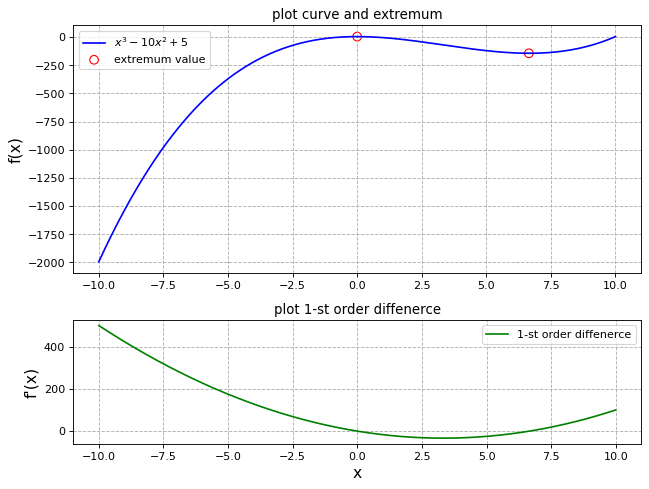

In [218]:
# set argument
x0 = -10
x1 = 10
size = 1000
func = lambda x : x**3 - 10 * x**2 + 5
funcName = r"$x^3-10x^2+5$"

plotCurve(x0, x1, size, func, funcName)

In [219]:
sgn = lambda x : 1 if x > 0 else -1
loc_sgn = sgn(-10)
loc_sgn

-1

## find extremum value by Gradient Descent trick

In [231]:
@timer
def trainFunc(x0, x1, size, func, funcName, strategy, *args, **kwargs):
    # set data
    x_data = np.linspace(x0, x1, size)
    y_data = func(x_data)
    dx = np.abs(x_data[1] - x_data[0])
    
    # train
    (x_gd, y_gd) = strategy(*args, **kwargs)

    plt.plot(x_data, y_data, color="blue", label=funcName)
    plt.plot(x_gd, y_gd, color="red", linestyle="dashed", label="history of update")
    plt.scatter(x_gd[0], y_gd[0], s=80, marker="o", facecolors="none", edgecolor="black", alpha=1, label="initial point")
    plt.scatter(x_gd[-1], y_gd[-1], s=80, marker="*", facecolors="none", edgecolor="red", alpha=1, label="final point")
    plt.grid(linestyle='--')
    #plt.xlim(-6, 6)
    #plt.ylim(-1, 30)
    plt.legend()
    plt.show()

## Gradient Descent

$
W^{t+1} \leftarrow W^{t} - \eta \frac{df(\theta)}{d\theta}
$

In [253]:
def GD(x_init, epochs, lr, stop_thershold):
    
    x_gd = [x_init]
    y_gd = [func(x_init)]
    w = x_init

    for t in range(epochs):
        loss = (func(x_gd[t] + dx) - func(x_gd[t])) / dx
        w = w - lr * loss

        x_gd.append(w)
        y_gd.append(func(w))
    
        if (np.abs(loss) < stop_thershold):
            print("stop at t = ", t)
            break

    return (x_gd, y_gd)

stop at t =  6


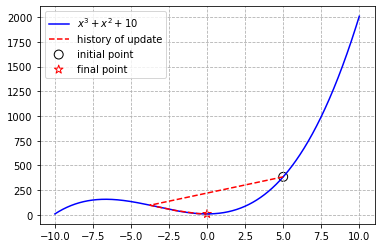

cost time: 0.11482 sec


In [254]:
# set argument
x0 = -10
x1 = 10
size = 10000
func = lambda x : x**3 + 10*x**2 + 10
funcName = r"$x^3+10*x^2+10$"

# for train
x_init = 5
epochs = 10000
lr = 0.05
stop_thershold = 0.0001

trainFunc(x0, x1, size, func, funcName, GD, x_init, epochs, lr, stop_thershold)

## Varilla Gradient Descent

$
W^{t+1} \leftarrow W^{t} - \frac{\eta}{\sqrt{t+1}} \frac{df(\theta)}{d\theta}
$

In [251]:
def VGD(x_init, epochs, lr, stop_thershold):
    
    x_gd = [x_init]
    y_gd = [func(x_init)]
    w = x_init

    for t in range(epochs):
        loss = (func(x_gd[t] + dx) - func(x_gd[t])) / dx
        w = w - lr / np.sqrt(t+1) * loss

        x_gd.append(w)
        y_gd.append(func(w))
    
        if (np.abs(loss) < stop_thershold):
            print("stop at t = ", t)
            break

    return (x_gd, y_gd)

stop at t =  58


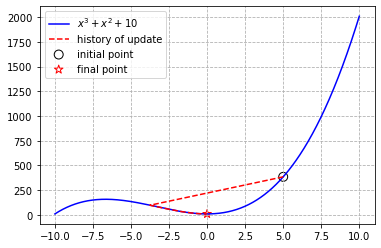

cost time: 0.11071 sec


In [255]:
# set argument
x0 = -10
x1 = 10
size = 10000
func = lambda x : x**3 + 10*x**2 + 10
funcName = r"$x^3+10*x^2+10$"

# for train
x_init = 5
epochs = 10000
lr = 0.05
stop_thershold = 0.0001


trainFunc(x0, x1, size, func, funcName, VGD, x_init, epochs, lr, stop_thershold)

## Adagrad

$
W^{t+1} \leftarrow W^{t} - \frac{\eta}{\sigma} \frac{df(\theta)}{d\theta}
$

$
\sigma = \sqrt{\sum{\frac{df(\theta)}{d\theta}^2}}
$

In [262]:
def Adagrad(x_init, epochs, lr, stop_thershold):
    
    x_gd = [x_init]
    y_gd = [func(x_init)]
    w = x_init
    sigma = 0 
    for t in range(epochs):
        loss = (func(x_gd[t] + dx) - func(x_gd[t])) / dx
        sigma = sigma + loss**2
        w = w - lr / np.sqrt(sigma) * loss

        x_gd.append(w)
        y_gd.append(func(w))
    
        if (np.abs(loss) < stop_thershold):
            print("stop at t = ", t)
            break

    return (x_gd, y_gd)

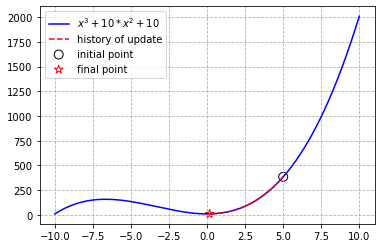

cost time: 0.15748 sec


In [263]:
# set argument
x0 = -10
x1 = 10
size = 10000
func = lambda x : x**3 + 10*x**2 + 10
funcName = r"$x^3+10*x^2+10$"

# for train
x_init = 5
epochs = 10000
lr = 0.05
stop_thershold = 0.0001


trainFunc(x0, x1, size, func, funcName, Adagrad, x_init, epochs, lr, stop_thershold)

## RMSProp

$
W^{t+1} \leftarrow W^{t} - \frac{\eta}{\sigma^t} \frac{df(\theta)}{d\theta}
$

$
\sigma^0 = g^0
$

$
\sigma^1 = \sqrt{\alpha (\sigma^0)^2 + (1-\alpha)(g^1)^2}
$

$
\sigma^{t+1} = \sqrt{\alpha (\sigma^t)^2 + (1-\alpha)(g^{t+1})^2}
$

In [264]:
def RMSProp(x_init, epochs, lr, alpha, stop_thershold):
    
    x_gd = [x_init]
    y_gd = [func(x_init)]
    w = x_init
    sigma = 0 
    for t in range(epochs):
        loss = (func(x_gd[t] + dx) - func(x_gd[t])) / dx
        if (t == 0):
            sigma = loss
        else:
            sigma = np.sqrt(alpha * (sigma**2) + (1-alpha) * (loss**2))
            
        w = w - lr / sigma * loss

        x_gd.append(w)
        y_gd.append(func(w))
    
        if (np.abs(loss) < stop_thershold):
            print("stop at t = ", t)
            break

    return (x_gd, y_gd)

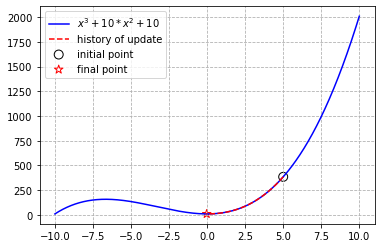

cost time: 0.15087 sec


In [266]:
# set argument
x0 = -10
x1 = 10
size = 10000
func = lambda x : x**3 + 10*x**2 + 10
funcName = r"$x^3+10*x^2+10$"

# for train
x_init = 5
epochs = 10000
lr = 0.05
alpha = 0.5 # lower = truth old info, higher = truth current info
stop_thershold = 0.0001


trainFunc(x0, x1, size, func, funcName, RMSProp, x_init, epochs, lr, alpha, stop_thershold)